In [1]:
from PIL import Image
import numpy as np
import os
import sys

In [2]:
import glob  #file pattern matching


In [3]:
print(os.getcwd())

C:\Users\pramo\Downloads\face-to-bmi\Data


#to resize all the images to 150*150 size
width=150
height=150
img_num=0
for filename in glob.glob('Images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    im=Image.open(filename).convert('L')#pillow to load image and convert to greyscale image
    out=im.resize((width,height),Image.ANTIALIAS)
    out.save("C:/Users/pramo/Downloads/face-to-bmi/Data/Resize_images/img_{}.bmp".format(img_num))
    img_num+=1
   

In [4]:
image_list=[]
for filename in glob.glob('Resize_images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    img=Image.open(filename)#pillow to load image
    image_list.append(img)#adding images to image_list


In [5]:
len(image_list)

4206

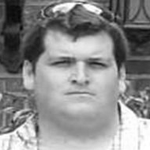

In [6]:
image_list[67]

#to find max size picture
maxx=0
count=0
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    #print(arr.shape)
    if(str(arr.shape)!='(52, 41)'):
        count+=1
print(count)
    #if(maxx<arr.size):
     #   maxx=arr.size
      #  string=str(arr.shape)
    #print(arr_1d)
    #X_img= np.vstack([X_img, arr_1d])
#print(maxx,string)      

meeee=np.array(image_list[0])
meee=meeee.flatten()
meee.shape

#to find min size picture
minn_x=np.array(image_list[0])
minn=minn_x.size
img_c=0
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    if(minn>arr.size):
        print(img_c)
        minn=arr.size
        string_min="hiwdd"
    #print(arr_1d)
    #X_img= np.vstack([X_img, arr_1d])
print(minn) 

x=np.empty([1,3])
a=np.array([[11,2,3]])
b=np.array([[1,22,13]])
a.shape
a=np.append(a,b,axis=0)
#vvv=np.array(image_list[0])
#vvv=vvv.flatten()
#vvv=vvv.reshape(1,22500)
a

In [11]:
#to convert images to array=>1d array=>2d array 
#appending all the image vectors to X_img vector
temp=1
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    arr_1d=arr.flatten()#to convert into 1D array
    arr_2d=arr_1d.reshape(1,22500) #to convert 1D to 2D array
    if(temp==1):
        X_img=arr_2d
        temp=0
    else:
        X_img=np.append(X_img,arr_2d,axis=0)#to add new rows to the X_image data



In [12]:
X_img.shape

(4206, 22500)

In [13]:
#standardising data(setting mean=0,variance=1)
from sklearn.preprocessing import StandardScaler

In [14]:
X_P_img=StandardScaler().fit_transform(X_img)

C:\Users\pramo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:

from sklearn.decomposition import PCA

In [16]:
#princinple components choosen should be 95% of variance
pca=PCA(.95)

In [17]:
#to find out principle components from X_P_img
pca.fit(X_P_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
#no:of principle components
pca.n_components_

355

In [19]:
X_P_img=pca.transform(X_P_img)

In [20]:
X_P_img.shape

(4206, 355)

In [21]:

import pandas as pd
#to read_csv file
data_unclean=pd.read_csv('data.csv')
#to show top 5rows
data_unclean.head()



,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


In [22]:
#to remove unnamed coloums in data
data=data_unclean.loc[:,~data_unclean.columns.str.contains('^Unnamed')]

data.head()



,bmi,gender,is_training,name
0,34.207396,Male,1,img_0.bmp
1,26.453720,Male,1,img_1.bmp
2,34.967561,Female,1,img_2.bmp
3,22.044766,Female,1,img_3.bmp
4,37.758789,Female,1,img_4.bmp


In [23]:
#should include is_training?
x_train=data.loc[:,['gender']]

x_train.head()


,gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [24]:
from sklearn.preprocessing import LabelEncoder#to convert categorical data to numerical data(gender col)

In [25]:
number=LabelEncoder()


In [26]:
x_train=number.fit_transform(x_train['gender'].astype('str'))

In [27]:
x_train=x_train.reshape(4206,1)

In [28]:
y_train=data.loc[:,['bmi']]
y_train=np.array(y_train)
y_train.shape

(4206, 1)

In [29]:
X_train=np.append(x_train,X_P_img,axis=1)
X_train.shape

(4206, 356)

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [32]:
X_train.shape

(3364, 356)

In [33]:
y_train.shape


(3364, 1)

In [34]:
#pd.DataFrame(X_train)

In [35]:
X_test.shape

(842, 356)

In [36]:
X_train.shape

(3364, 356)

In [37]:
y_train=y_train.reshape(3364,)

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid={'max_depth':range(2,16,2),#depth of the tree 
            'min_samples_split':range(2,16,2)}#noof samples to be consider at leaf node means to stop splitting at specified number

tree=DecisionTreeRegressor()
grid_search=GridSearchCV(tree,param_grid)
model=grid_search.fit(X_train,y_train)
print(model.best_params_)

In [107]:
#best parameters are max_depth=2,min_samples_split=6
tree=DecisionTreeRegressor(max_depth=2,min_samples_split=6)

In [108]:
model=tree.fit(X_train,y_train)

In [109]:
prediction=model.predict(X_test)

In [110]:
MSE=mean_squared_error(prediction,y_test)

In [111]:
score=model.score(X_test,y_test)

In [112]:
print("Mean sqaure error={} , R2_score={}".format(MSE,score))

Mean sqaure error=65.75912068813837 , R2_score=-0.032555398337878794


In [113]:
from matplotlib import pyplot

Text(0.5,0,'true values')

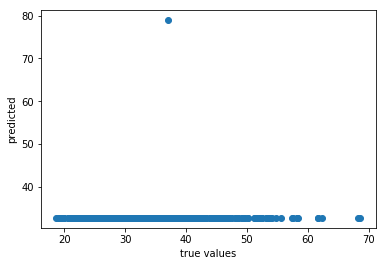

In [114]:
pyplot.scatter(y_test,prediction)
pyplot.ylabel('predicted')
pyplot.xlabel('true values')

In [115]:
def export_prediction_Dt():
    return prediction

In [116]:
s=export_prediction_Dt()